<a href="https://colab.research.google.com/github/deverchat24/DLpractice-MnistClasifier/blob/MnistClassiffier/Dlpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualization and prepration

Libreries

In [0]:
import tensorflow as tf
import sklearn as sk
import matplotlib as mpl
import keras 
from matplotlib import pyplot as plt

import numpy as np
from numpy import linalg

Mnist dataset importation and visualization

In [0]:
from keras.datasets import mnist

(x_train, y_train) , (x_test,y_test) = mnist.load_data() #Cargamos los datos tanto como de entrenamiento
                                                         #como de testeo (junto a la "label"(y) y el
                                                         #dato de entrada (x))
  

In [212]:
print(x_train.ndim)  #.ndim para la dimnesión (como es 3 = tensor 3D)
print(x_train.shape) #.shpe para ver la disposicion y cantidad de datos (60k datos de 28*26 pixeles,
                     # tensor 60000x28x28)
print(x_train.dtype) #.dtype = data type
len(y_train)         # para ver la cantidad de datos para y_train

3
(60000, 28, 28)
uint8


60000

3


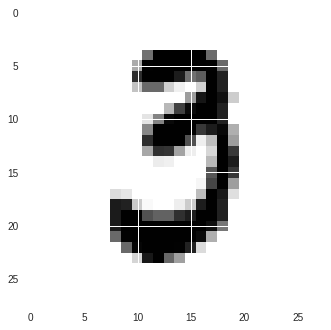

In [213]:
umpteenthElement = 9991
plt.imshow(x_train[umpteenthElement], cmap = plt.cm.binary) #mapeamos una "x" enesima en forma de imagen
print(y_train[umpteenthElement]) #mostramos la "label" del enesimo elemento

8


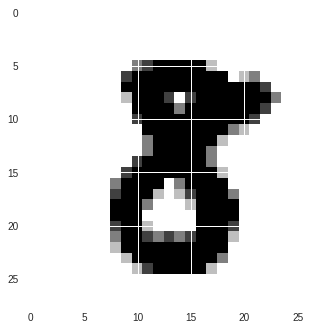

In [214]:
plt.imshow(x_test[umpteenthElement], cmap = plt.cm.binary) #mapeamos una "x" enesima en forma de imagen
print(y_test[umpteenthElement])

In [215]:
np.set_printoptions(precision=2, suppress=True, linewidth=500) #cambiamos valores para print desde numpy
print(np.matrix(x_train[umpteenthElement]))  #mostramos el enesimo "x" en su forma de arreglo (Matriz)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 142 254 254 254 254 255 148   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  84 252 253 253 253 253 253 252 149   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 209 253 253 253 227 142 162 253 220   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  60 149 149  48  15   0  46 253 220   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  98 233 253 237  5

Data preparing

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32') #cambiamos data type de unit8 a float32 "por conveniencia"
x_train /= 255
x_test /=255   #Asi nuestros valores que oscilaban entre 0 y 255 pasan a oscilar entre 0 y 1, mucho mejor!

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784) #convertimos los tensores unidadx28x28 en unidadx784
                                    #(arreglo unidimensional)
                                    #pues nuestra capa de entrada es unidimenisonal, algo que con las
                                    #convolucionales no pasa
      

In [0]:
from keras.utils import to_categorical #import one-hot encoding transformation
y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

#NN

Sequential class and model definition





In [219]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import sgd

model = Sequential()
model.add(Dense(10, activation = 'sigmoid', input_shape = (784,))) #shape = 784 imput neurons
model.add(Dense(10, activation = 'softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Configuration, training and nn testing

In [220]:
model.compile(loss = 'categorical_crossentropy', #Funcion de calculo de loss
              optimizer = 'sgd',                  #Optimizador = stocastic gradient desccent (ajusta w)
              metrics = ['accuracy'])            #Metrica de accuracy calcula la precisón

b_s = 10
ep = 5


model.fit(x_train, y_train,
          batch_size = b_s, #actualizaciones cada b_s iteraciones
          epochs = ep,
          verbose = 1
          )

#Test
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('------------')
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


Epoch 1/5
60000/60000 [==============================] - 7s 122us/step - loss: 1.3164 - acc: 0.6965
Epoch 2/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.6435 - acc: 0.8528
Epoch 3/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.4913 - acc: 0.8797
Epoch 4/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.4240 - acc: 0.8914
Epoch 5/5
10000/10000 [==============================] - 0s 40us/step
------------
Test loss: 0.36020713679790495
Test accuracy: 0.9081


# Confusion matrix

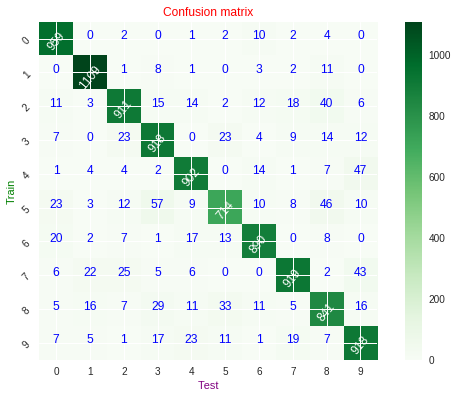

In [221]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,             #Function config
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap) #Mostrar todos los datos del grafo
    plt.title(title, color = 'red')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation = 45)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "blue"
                ,rotation = 50 if cm[i, j] > thresh else 0)

    plt.tight_layout()
    plt.ylabel('Train', color = 'green')
    plt.xlabel('Test', color = 'purple')
    
    
    
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
Y_true = np.argmax(y_test, axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [222]:
predictions = model.predict(x_test)

print(np.sum(predictions[umpteenthElement]))
print(np.argmax(predictions[umpteenthElement]))

0.99999994
8
